In [1]:
!nvidia-smi
import pickle 
import matplotlib.pyplot as plt
import random
import numpy as np
from __future__ import print_function, division

from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import RMSprop

import keras.backend as K

import matplotlib.pyplot as plt

import sys

import numpy as np
import h5py

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!wget https://data.vision.ee.ethz.ch/sagea/lld/data/LLD-icon.hdf5

--2020-10-04 10:24:39--  https://data.vision.ee.ethz.ch/sagea/lld/data/LLD-icon.hdf5
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 798927457 (762M)
Saving to: ‘LLD-icon.hdf5’

LLD-icon.hdf5       100%[===================>] 761.92M  50.6MB/s    in 15s     

2020-10-04 10:24:54 (49.8 MB/s) - ‘LLD-icon.hdf5’ saved [798927457/798927457]



In [3]:
hdf5_file=h5py.File('/content/LLD-icon.hdf5','r')
images,labels,names=(hdf5_file['data'].value,hdf5_file['labels/resnet/rc_128'].value,hdf5_file['meta_data/names'].value)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


In [4]:
images.shape,labels.shape,names.shape

((486377, 3, 32, 32), (486336,), (486377,))

In [5]:
bad_clusters=[4,5,6,8,12,14,18,22,26,27,28,30,34,35,36,37,42,43,46,47,48,50,52,53,57,60,62,63,64,65,68,73,77,85,86,95,96,103,105,106,107,108,111,112,116,117,120]

In [ ]:
for i in range(128):
  fig1, axs1 = plt.subplots(4, 4)
  cnt = 0
  for z in range(4):
        for x in range(4):
                plt.grid(False)
                axs1[z,x].imshow(images[np.argwhere(labels==i).flatten()][cnt,:,:,:].T) 
                axs1[z,x].set_title(i)
                cnt+=1
  i=i+1

In [6]:
all_df=images.copy()

In [7]:
images_lab=list(zip(images,labels))


In [8]:
images_lab[0][1]

64

In [9]:
clear_list=[val for val in images_lab if val[1] not in bad_clusters]

In [78]:
len(clear_list)

314516

In [74]:
l=[el for el in range(128)]
dct = {}
for i in list(set(l) - set(bad_clusters)):
    dct['array_%s' % i] = []

In [75]:
for image in clear_list:
  print(image[1])
  for d in dct.keys():
    if image[1]==int(d.split('_')[1]):
      dct[d].append(image[0].T.reshape(1,32,32,3))
      break

Выходные данные были обрезаны до нескольких последних строк (5000).
125
44
88
125
54
114
114
58
9
24
20
113
67
91
71
125
19
114
71
124
15
59
109
38
101
71
127
71
83
80
121
0
1
33
20
102
127
3
33
89
118
82
11
0
93
121
90
24
87
71
23
71
24
127
49
123
81
29
71
56
123
55
98
102
69
1
3
10
78
10
76
13
41
32
90
72
87
83
10
79
38
17
74
10
102
71
3
1
11
91
45
16
104
118
100
44
29
93
29
118
24
21
29
98
70
40
39
92
51
54
70
126
29
78
84
93
17
71
29
100
74
11
21
92
2
0
123
92
24
80
61
70
72
87
7
121
70
19
121
119
80
54
98
29
69
93
10
124
13
101
3
38
101
56
55
78
17
56
82
15
40
24
113
78
82
78
78
87
115
87
13
25
61
24
10
100
94
33
9
39
40
78
80
72
1
71
83
1
20
32
76
32
81
74
123
97
32
24
24
29
15
32
87
110
71
99
11
127
101
124
70
9
51
39
114
40
70
84
75
98
29
24
7
56
88
90
24
127
104
90
13
13
82
61
87
81
118
122
124
24
75
81
114
66
98
97
84
3
9
56
23
87
81
88
109
101
93
119
70
58
118
93
78
19
9
113
90
61
78
121
102
16
21
41
17
119
1
29
121
40
56
55
70
91
2
75
92
78
104
82
109
10
25
101
58
32
122
56

In [77]:
l=[el for el in range(128)]
dct1 = {}
for i in list(set(l) - set(bad_clusters)):
    dct1['array_%s' % i] = []

for d in dct.keys():
  print(d)
  dct1[d]=np.concatenate(dct[d])

array_0
array_1
array_2
array_3
array_7
array_9
array_10
array_11
array_13
array_15
array_16
array_17
array_19
array_20
array_21
array_23
array_24
array_25
array_29
array_31
array_32
array_33
array_38
array_39
array_40
array_41
array_44
array_45
array_49
array_51
array_54
array_55
array_56
array_58
array_59
array_61
array_66
array_67
array_69
array_70
array_71
array_72
array_74
array_75
array_76
array_78
array_79
array_80
array_81
array_82
array_83
array_84
array_87
array_88
array_89
array_90
array_91
array_92
array_93
array_94
array_97
array_98
array_99
array_100
array_101
array_102
array_104
array_109
array_110
array_113
array_114
array_115
array_118
array_119
array_121
array_122
array_123
array_124
array_125
array_126
array_127


In [88]:
for k in dct1.keys():
  print(dct1[k].shape)

(3605, 32, 32, 3)
(3627, 32, 32, 3)
(3315, 32, 32, 3)
(4415, 32, 32, 3)
(3846, 32, 32, 3)
(4383, 32, 32, 3)
(5496, 32, 32, 3)
(4296, 32, 32, 3)
(3309, 32, 32, 3)
(4403, 32, 32, 3)
(3839, 32, 32, 3)
(4810, 32, 32, 3)
(4840, 32, 32, 3)
(5437, 32, 32, 3)
(3924, 32, 32, 3)
(1913, 32, 32, 3)
(7381, 32, 32, 3)
(4524, 32, 32, 3)
(4925, 32, 32, 3)
(4460, 32, 32, 3)
(3875, 32, 32, 3)
(5869, 32, 32, 3)
(4141, 32, 32, 3)
(3330, 32, 32, 3)
(5979, 32, 32, 3)
(3802, 32, 32, 3)
(2941, 32, 32, 3)
(3142, 32, 32, 3)
(3093, 32, 32, 3)
(5362, 32, 32, 3)
(2660, 32, 32, 3)
(3450, 32, 32, 3)
(3928, 32, 32, 3)
(4627, 32, 32, 3)
(3051, 32, 32, 3)
(3580, 32, 32, 3)
(3714, 32, 32, 3)
(2135, 32, 32, 3)
(3522, 32, 32, 3)
(5064, 32, 32, 3)
(4369, 32, 32, 3)
(4309, 32, 32, 3)
(4271, 32, 32, 3)
(4166, 32, 32, 3)
(3203, 32, 32, 3)
(5615, 32, 32, 3)
(4242, 32, 32, 3)
(3435, 32, 32, 3)
(4395, 32, 32, 3)
(4658, 32, 32, 3)
(3618, 32, 32, 3)
(2616, 32, 32, 3)
(2942, 32, 32, 3)
(2778, 32, 32, 3)
(3184, 32, 32, 3)
(3859, 32,

In [94]:
class WGAN():
    def __init__(self):
        self.img_rows = 32
        self.img_cols = 32
        self.channels = 3
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        # Following parameter and optimizer set as recommended in paper
        self.n_critic = 5
        self.clip_value = 0.01
        optimizer = RMSprop(lr=0.0005)

        # Build and compile the critic
        self.critic = self.build_critic()
        self.critic.compile(loss=self.wasserstein_loss,
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generated imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.critic.trainable = False

        # The critic takes generated images as input and determines validity
        valid = self.critic(img)

        # The combined model  (stacked generator and critic)
        self.combined = Model(z, valid)
        self.combined.compile(loss=self.wasserstein_loss,
            optimizer=optimizer,
            metrics=['accuracy'])

    def wasserstein_loss(self, y_true, y_pred):
        return K.mean(y_true * y_pred)
  

    def build_generator(self):
        model = Sequential()
        model.add(Dense(128 * 8 * 8, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((8, 8, 128)))
        model.add(UpSampling2D())
        model.add(Conv2D(128, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(UpSampling2D())
        model.add(Conv2D(64, kernel_size=4, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(Conv2D(self.channels, kernel_size=4, padding="same"))
        model.add(Activation("tanh"))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_critic(self):

        model = Sequential()

        model.add(Conv2D(16, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(32, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(128, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        model.add(Dense(1))

        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)
        
    def train(self, epochs, train_df, batch_size=400, sample_interval=50):

        # Load the dataset
        X_train=train_df

        # Rescale -1 to 1
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        #X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = -np.ones((batch_size, 1))
        fake = np.ones((batch_size, 1))

        for epoch in range(epochs):

            for _ in range(self.n_critic):

                # ---------------------
                #  Train Discriminator
                # ---------------------

                # Select a random batch of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                
                # Sample noise as generator input
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

                # Generate a batch of new images
                gen_imgs = self.generator.predict(noise)

                # Train the critic
                d_loss_real = self.critic.train_on_batch(imgs, valid)
                d_loss_fake = self.critic.train_on_batch(gen_imgs, fake)
                d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

                # Clip critic weights
                for l in self.critic.layers:
                    weights = l.get_weights()
                    weights = [np.clip(w, -self.clip_value, self.clip_value) for w in weights]
                    l.set_weights(weights)


            # ---------------------
            #  Train Generator
            # ---------------------

            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f] [G loss: %f]" % (epoch, 1 - d_loss[0], 1 - g_loss[0]))
            self.critic.save("/content/drive/My Drive/gan_models/discriminator_1.h5")
            self.generator.save("/content/drive/My Drive/gan_models/generator_1.h5")
            self.combined.save("/content/drive/My Drive/gan_models/combined_1.h5")
            # If at save interval => save generated image samples

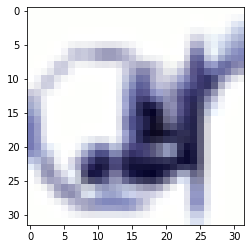

In [87]:
plt.imshow(dct1['array_0'][6,:,:,:])

In [ ]:
wgan = WGAN()
wgan.train(epochs=4000, train_df=dct1['array_1'], batch_size=40, sample_interval=50)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 16, 16, 16)        448       
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 9, 9, 32)          0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 9, 9, 32)          128       
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 9, 9, 32)        